In [1]:
from main import FingerMatch
import os
import cv2
import sys
import math
import warnings
import numpy as np
from zipfile import ZipFile

import pandas as pd

#import gdal
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style()

from scipy import ndimage as ndi
from skimage import feature

from PIL import Image
from IPython.display import display

from libs.enhancing import *
from libs.basics import *
from libs.processing import *

if not sys.warnoptions:
    warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
# Revert gray colour levels. Match scale with the raw image for comparison.
path_train = '/home/tan/Documents/PythonProjects/AI/FingerMatch-20220508T085804Z-001/FingerMatch/data/Fingerprints - Set A/101_1.tif'
path_test = '/home/tan/Documents/PythonProjects/AI/FingerMatch-20220508T085804Z-001/FingerMatch/data/Fingerprints - Set B/101_1.tif'

# Image loading
img_train = load_image(path_train, True)
img_test = load_image(path_test, True)

In [3]:
path = '/home/tan/Documents/PythonProjects/AI/FingerMatch-20220508T085804Z-001/FingerMatch/data/Fingerprints - Set A'

fm = FingerMatch('tree',)
fm.loadData(path)
fm.trainData()
# scores = fm.matchFingerprint(img_train, verbose=False, )


INFO: Dataset loaded successfully. Duration: 0.03 sec
INFO: Loading model features. Model: tree
INFO: Training completed in 394.58 sec


In [4]:
fm.images[0].profile.keys()

dict_keys([])

In [8]:
# fm.save_as_pickle()

In [3]:
from libs.minutiae import *
fm = FingerMatch('tree',)
fm.load_from_pickle()


In [6]:
fm.images[0].profile
# display_image(fm.images[0].image_enhanced)
# plot_minutiae(fm.images[0].image_enhanced, fm.images[0].minutiae, size = 8)

{(27,
  201): array([[ 2.39,  2.48,  2.57,  2.74,  1.04,  1.08,  1.15,  1.03,  1.1 ,
          1.07],
        [38.28, 24.85, 26.48, 80.17, 13.43, 11.8 , 41.89,  1.63, 55.32,
         53.69]]),
 (54,
  45): array([[ 8.86, 15.66, 15.89, 16.33,  1.77,  1.79,  1.84,  1.01,  1.04,
          1.03],
        [73.61, 16.7 , 12.72, 11.48, 56.91, 60.89, 62.13,  3.97,  5.22,
          1.24]]),
 (64,
  79): array([[  1.03,   1.52,   1.6 ,   1.61,   1.48,   1.56,   1.57,   1.05,
           1.06,   1.01],
        [  6.38,  82.26, 134.57,  78.97,  88.64, 128.19,  85.35, 143.16,
           3.29, 146.45]]),
 (75,
  154): array([[  1.07,   2.26,   3.17,   3.38,   2.12,   2.97,   3.17,   1.4 ,
           1.5 ,   1.07],
        [ 10.9 ,  61.15,  82.84,  22.85,  72.05,  71.93,  11.95, 143.98,
          84.  ,  59.98]]),
 (82,
  265): array([[  1.8 ,   5.13,   9.03,   9.09,   2.84,   5.01,   5.04,   1.76,
           1.77,   1.01],
        [ 33.69, 135.  , 158.05, 161.56, 101.31, 168.26, 127.88,  66.95,
     

Termination: 15, 153


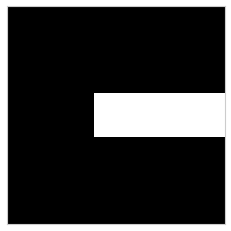

Termination: 16, 160


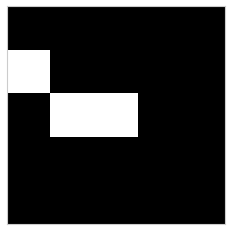

Termination: 20, 110


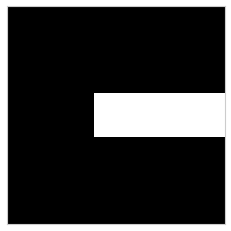

Termination: 22, 100


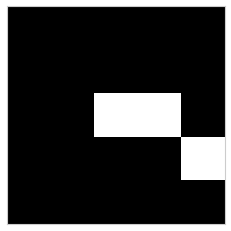

Termination: 23, 108


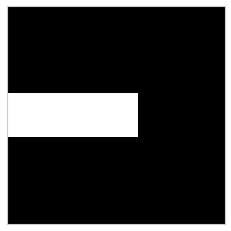

Termination: 23, 161


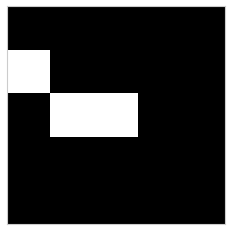

Termination: 25, 96


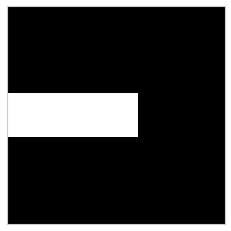

Termination: 26, 89


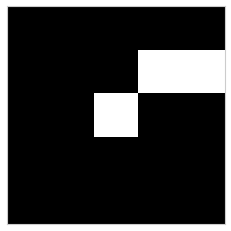

Termination: 27, 171


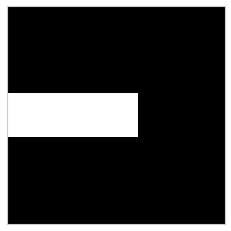

Termination: 34, 80


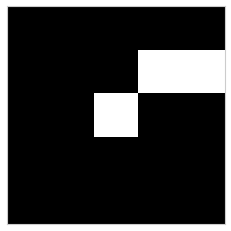

Termination: 37, 182


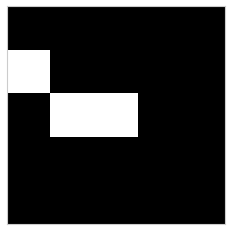

Termination: 43, 75


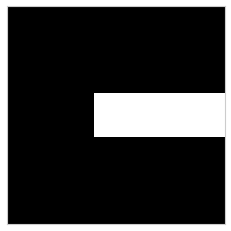

Termination: 46, 186


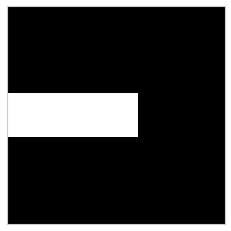

Termination: 52, 70


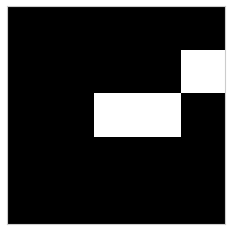

Termination: 52, 178


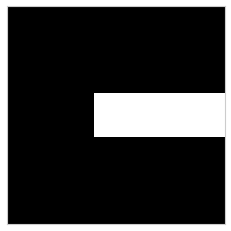

Termination: 52, 190


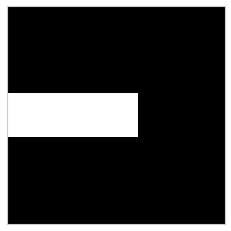

Termination: 58, 64


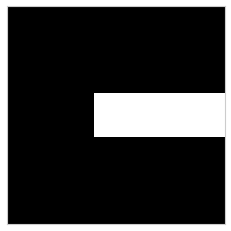

Termination: 59, 189


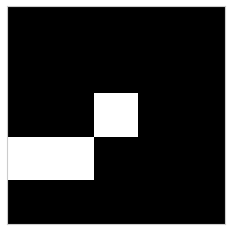

Termination: 64, 90


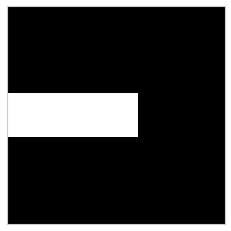

Termination: 67, 187


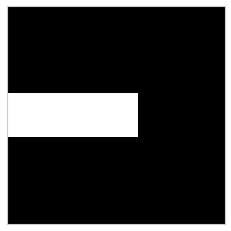

Termination: 70, 58


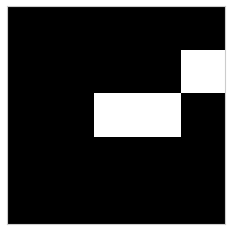

Termination: 72, 193


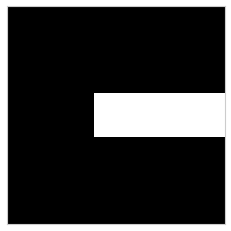

Termination: 72, 200


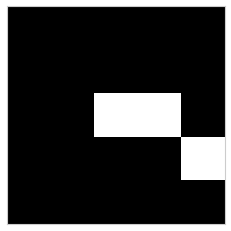

Termination: 73, 197


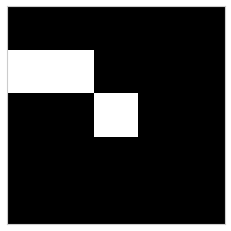

Termination: 74, 100


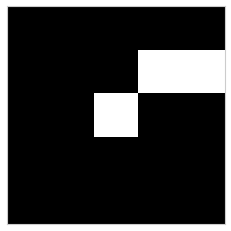

Termination: 75, 206


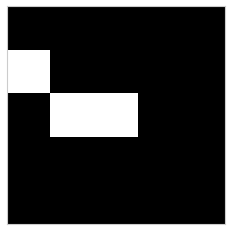

Termination: 76, 61


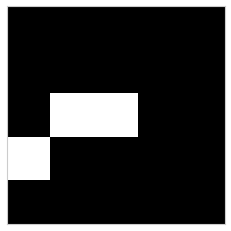

Termination: 80, 80


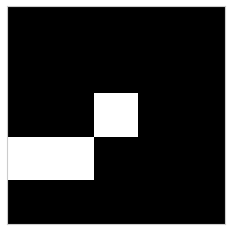

Termination: 81, 54


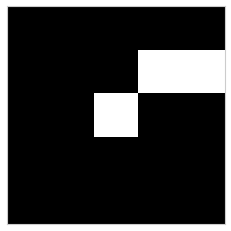

Termination: 84, 60


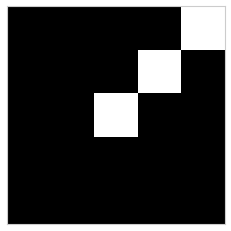

Termination: 87, 100


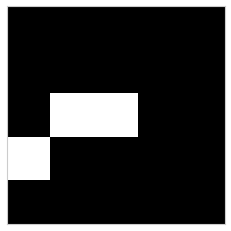

Termination: 90, 215


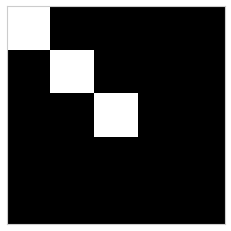

Termination: 96, 213


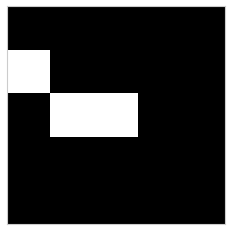

Termination: 98, 49


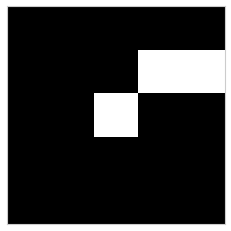

Termination: 100, 128


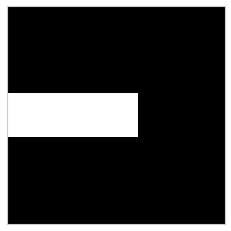

Termination: 105, 53


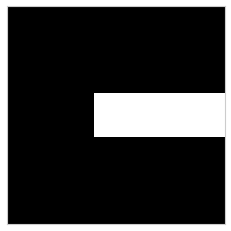

Termination: 108, 221


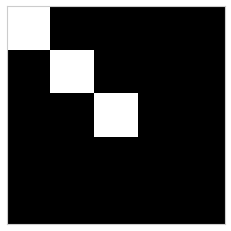

Termination: 116, 41


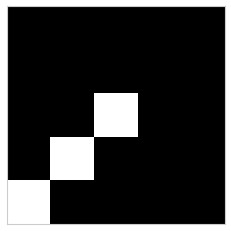

Termination: 117, 217


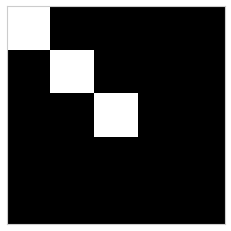

Termination: 120, 38


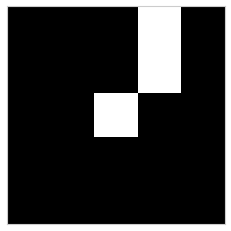

Termination: 125, 43


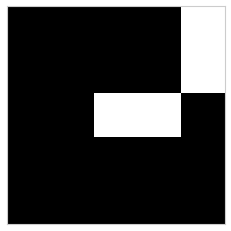

Termination: 134, 42


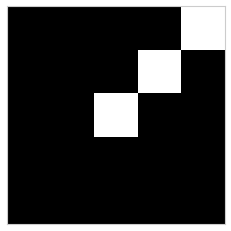

Termination: 135, 225


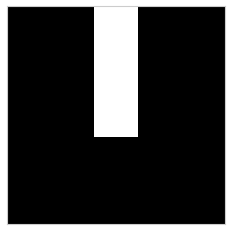

Termination: 146, 75


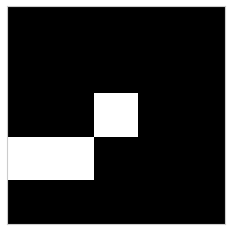

Termination: 146, 225


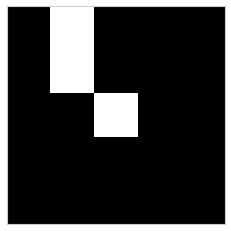

Termination: 147, 37


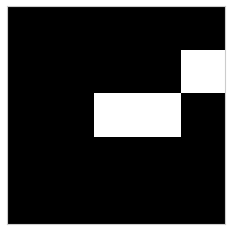

Termination: 151, 42


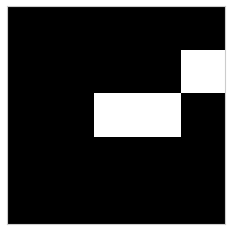

Termination: 161, 210


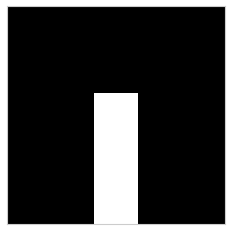

Termination: 165, 37


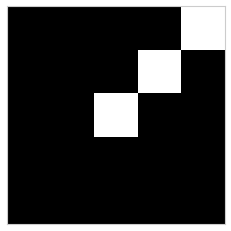

Termination: 171, 161


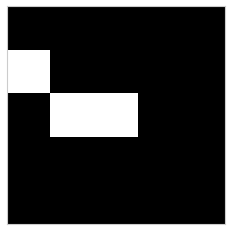

Termination: 171, 225


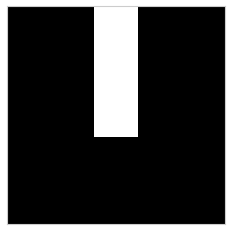

Termination: 176, 162


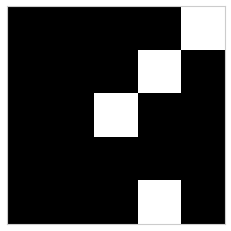

Termination: 177, 158


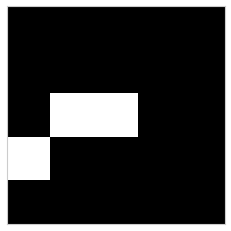

Termination: 178, 163


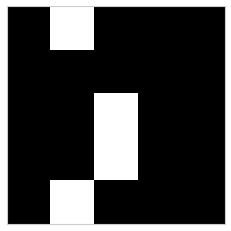

Termination: 179, 43


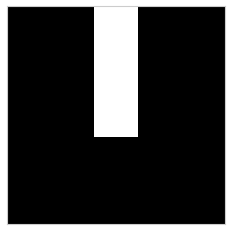

Termination: 179, 51


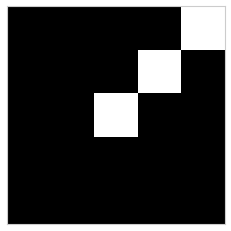

Bifurcation: 179, 169


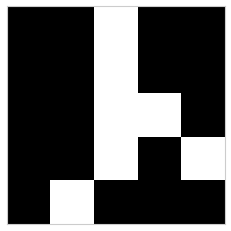

Bifurcation: 181, 152


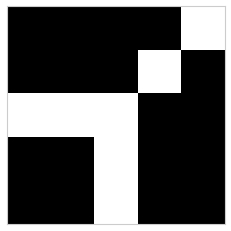

Termination: 183, 42


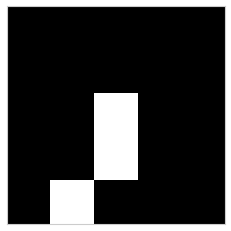

Termination: 183, 66


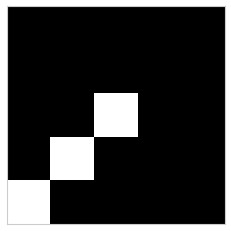

Termination: 189, 158


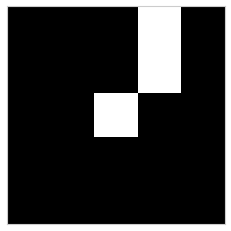

Termination: 191, 37


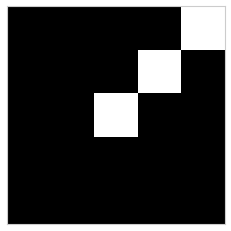

Termination: 192, 161


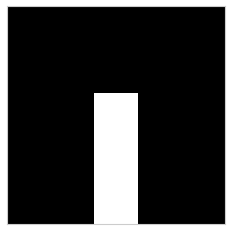

Termination: 194, 155


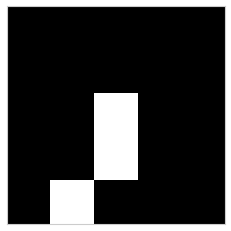

Bifurcation: 199, 63


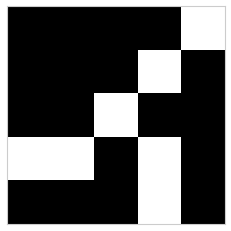

Termination: 206, 34


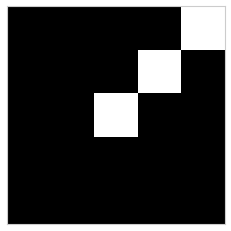

Termination: 211, 38


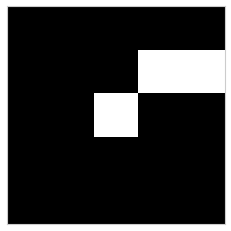

Termination: 223, 36


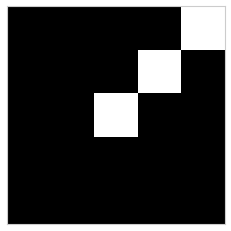

Termination: 233, 36


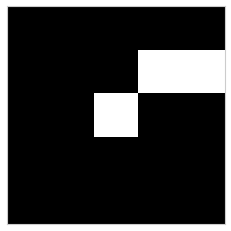

Termination: 233, 48


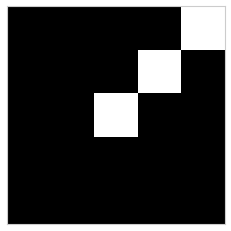

Termination: 235, 206


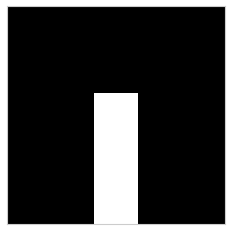

Termination: 237, 225


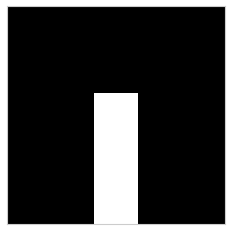

Termination: 246, 131


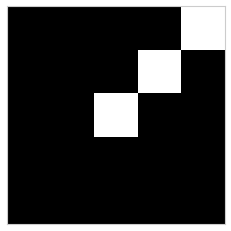

Termination: 250, 128


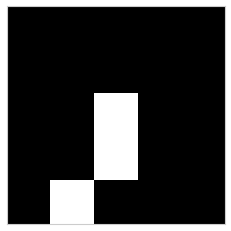

Termination: 251, 42


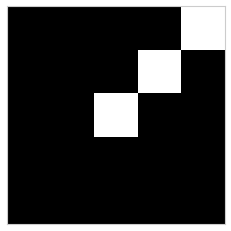

Termination: 260, 44


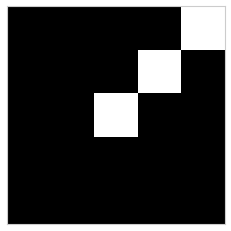

Termination: 266, 50


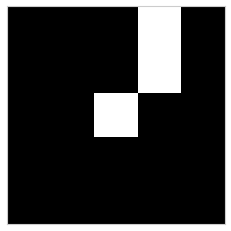

Termination: 271, 148


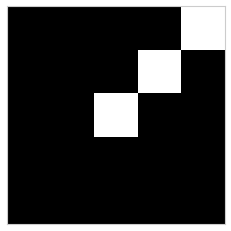

Termination: 272, 53


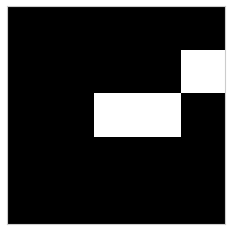

Termination: 278, 59


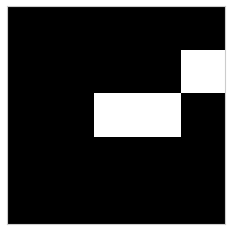

Termination: 281, 213


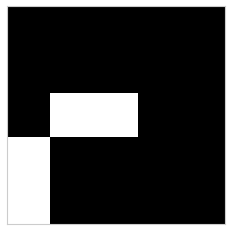

Termination: 284, 66


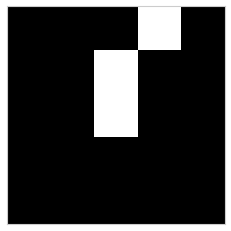

Termination: 284, 73


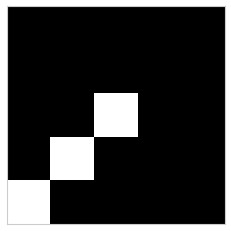

Termination: 284, 78


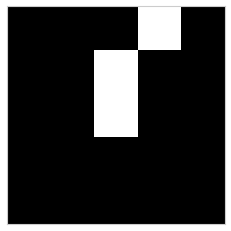

Termination: 284, 201


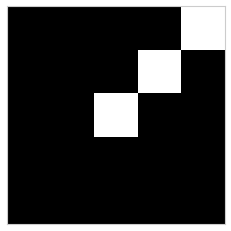

Termination: 288, 206


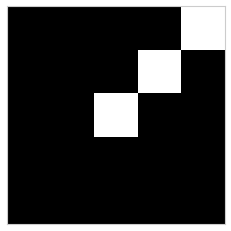

Termination: 292, 165


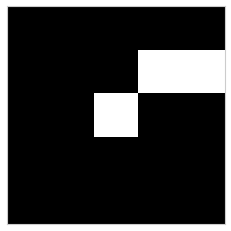

Termination: 293, 66


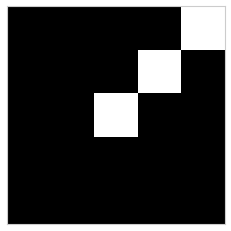

Termination: 293, 78


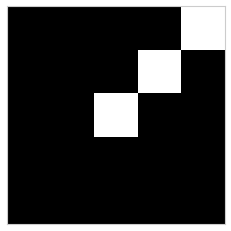

Termination: 295, 84


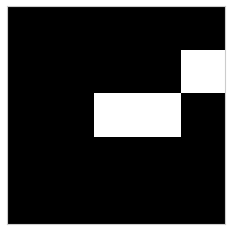

Termination: 299, 182


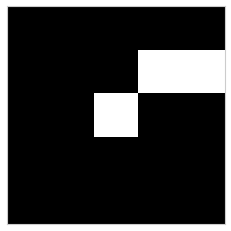

Termination: 301, 175


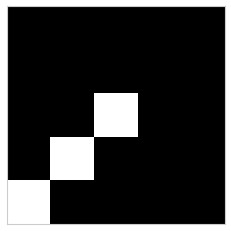

Termination: 302, 87


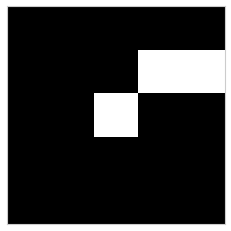

Termination: 305, 93


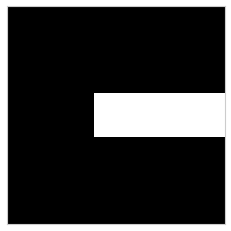

Termination: 305, 105


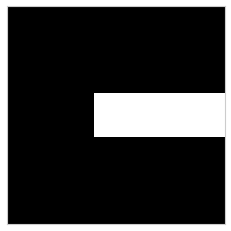

Termination: 305, 116


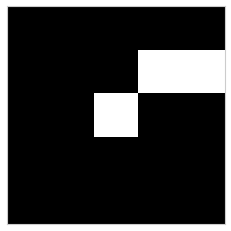

Termination: 305, 128


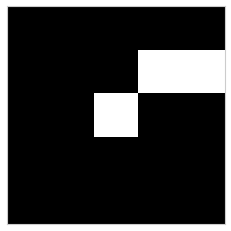

Termination: 305, 142


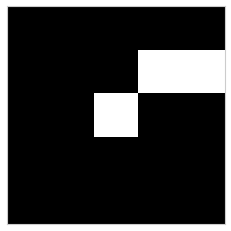

Termination: 305, 153


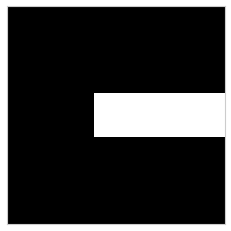

Termination: 305, 168


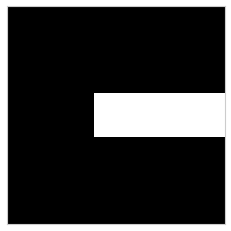

0 , (52, 178)
1 , (64, 90)
2 , (74, 100)
3 , (76, 61)
4 , (80, 80)
5 , (87, 100)
6 , (100, 128)
7 , (146, 75)
8 , (161, 210)
9 , (171, 161)
10 , (176, 162)
11 , (177, 158)
12 , (178, 163)
13 , (179, 51)
14 , (183, 66)
15 , (189, 158)
16 , (192, 161)
17 , (194, 155)
18 , (233, 48)
19 , (235, 206)
20 , (246, 131)
21 , (250, 128)
22 , (271, 148)
23 , (284, 78)
24 , (292, 165)
25 , (179, 169)
26 , (181, 152)
27 , (199, 63)
INFO: Score - 0.0
Not a match with 105_6
INFO: Score - 0.021052631578947368
Not a match with 110_6
INFO: Score - 0.0
Not a match with 109_6
INFO: Score - 0.0
Not a match with 108_5
INFO: Score - 0.0
Not a match with 108_1
INFO: Score - 0.0
Not a match with 106_4
INFO: Score - 0.0
Not a match with 103_5
INFO: Score - 0.0
Not a match with 102_5
INFO: Score - 0.0
Not a match with 102_7
INFO: Score - 0.0
Not a match with 105_4
INFO: Score - 0.0
Not a match with 106_7
INFO: Score - 0.0
Not a match with 106_8
INFO: Score - 0.0
Not a match with 106_2
INFO: Score - 0.0
Not a mat

In [5]:
scores = fm.matchFingerprint(img_test, verbose=False, )